In [1]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
%matplotlib inline
from nltk.tokenize import RegexpTokenizer
import numpy as np # linear algebra
import pandas as pd #data processing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import os
import re
import nltk


# Data Analysis

In [2]:
#Loading the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head()#Real news =1 and Fake news =0


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [5]:
print(train.shape, test.shape)

(20800, 5) (5200, 4)


In [6]:
#Checking for null values
print(train.isnull().sum())
print('************')
print(test.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64
************
id          0
title     122
author    503
text        7
dtype: int64


In [7]:
#Dropping Null Values
test=test.dropna()
train=train.dropna()

In [8]:
print(test.isnull().sum())
print(test.isnull().sum())


id        0
title     0
author    0
text      0
dtype: int64
id        0
title     0
author    0
text      0
dtype: int64


In [9]:
print(train.shape, test.shape)

(18285, 5) (4575, 4)


In [10]:
test['total']=test['title']+' '+test['text'] #to add text in one coloumn
train['total']=train['title']+' '+train['text']

In [11]:
train['label'].value_counts()

0    10361
1     7924
Name: label, dtype: int64

Text(0.5, 1.0, 'News Clasified as fake or real')

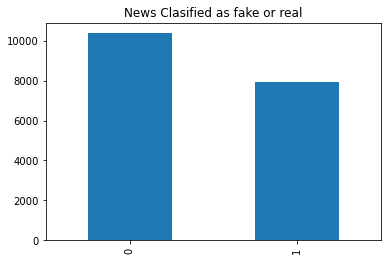

In [12]:
#Checking if the data is balanced or imbalanced
train['label'].value_counts().plot(kind = "bar")#Class division
plt.title("News Clasified as fake or real")

# Data Cleaning

In [14]:
#Using NLTK for preprocessing
nltk.download("stopwords")
from nltk.corpus import stopwords
tokenizer=RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aynaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
#Tokenization
train['total']=train['total'].apply(lambda x:tokenizer.tokenize(x.lower()))
train['total'].head()

0    [house, dem, aide, we, didn, t, even, see, com...
1    [flynn, hillary, clinton, big, woman, on, camp...
2    [why, the, truth, might, get, you, fired, why,...
3    [15, civilians, killed, in, single, us, airstr...
4    [iranian, woman, jailed, for, fictional, unpub...
Name: total, dtype: object

In [16]:
#Removing Stopwords
def remove_stopwords(text):
    words=[w for w in text if  not w in stop_words]
    return words
train['total']=train['total'].apply(lambda x:remove_stopwords(x))
train['total'].head()

0    [house, dem, aide, even, see, comey, letter, j...
1    [flynn, hillary, clinton, big, woman, campus, ...
2    [truth, might, get, fired, truth, might, get, ...
3    [15, civilians, killed, single, us, airstrike,...
4    [iranian, woman, jailed, fictional, unpublishe...
Name: total, dtype: object

In [18]:
#Lemmatizing the text to get the root word
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
def word_lemmatizer(text):
    lem_text=' '.join([lemmatizer.lemmatize(i) for i in text])
    return lem_text
train['total']=train['total'].apply(lambda x:word_lemmatizer(x))
train['total'].head()

0    house dem aide even see comey letter jason cha...
1    flynn hillary clinton big woman campus breitba...
2    truth might get fired truth might get fired oc...
3    15 civilian killed single u airstrike identifi...
4    iranian woman jailed fictional unpublished sto...
Name: total, dtype: object

# Word Cloud for Analysis

Text(0.5, 1.0, 'The most frequent words generated in Real Articles')

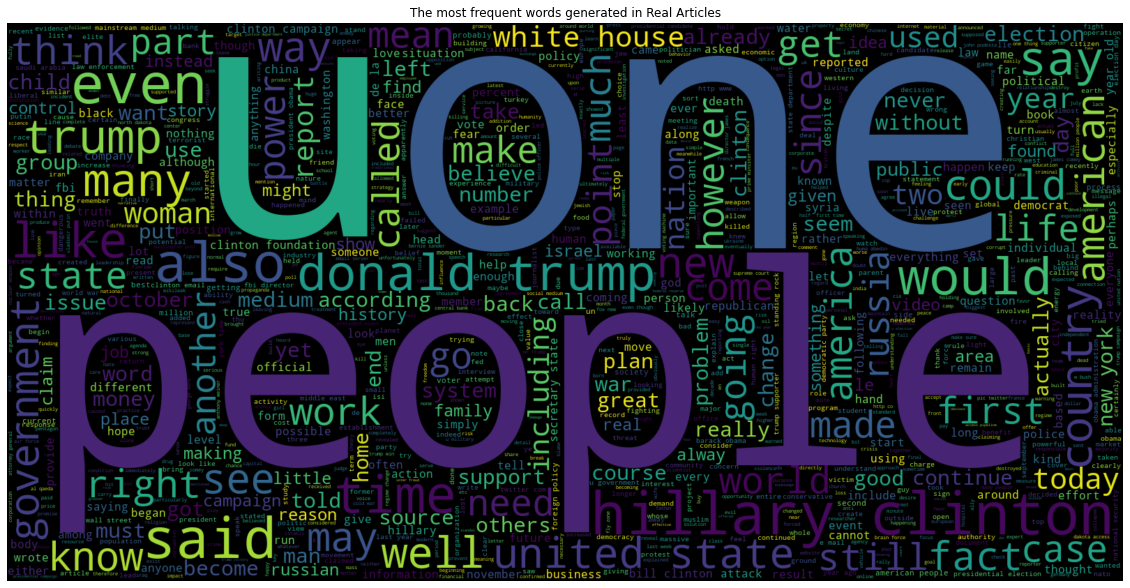

In [39]:
#Analysing the most words produced in real articles
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.label == 1].total))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Real Articles")

Text(0.5, 1.0, 'The most frequent words generated in Fake Articles')

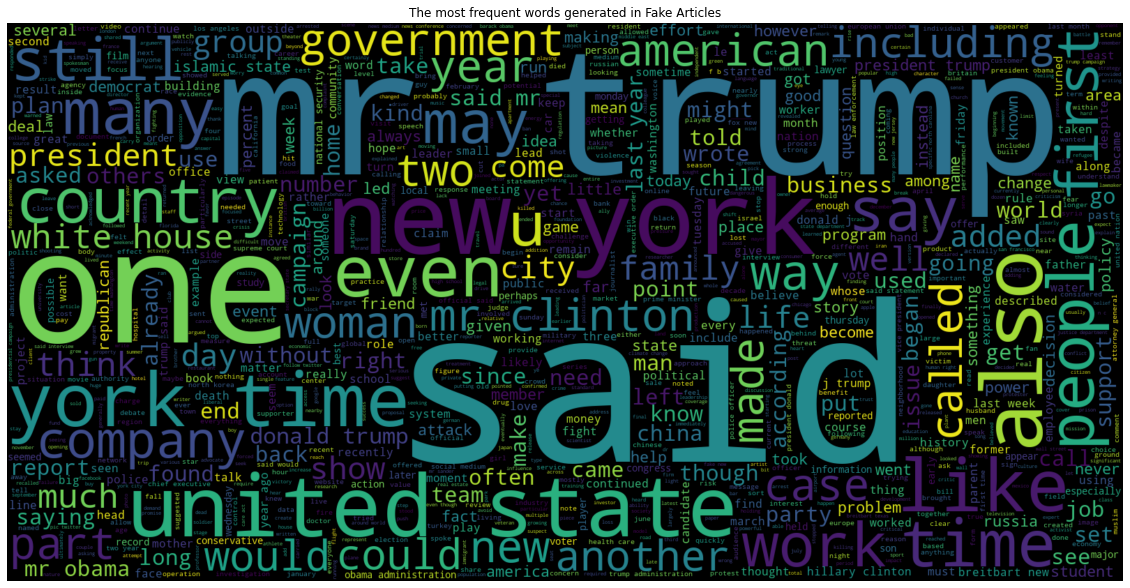

In [40]:
#Analysing the most words produced in fake articles
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(train[train.label == 0].total))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.title("The most frequent words generated in Fake Articles")

 # Vectorizing 

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#Defining independent and dependent variables
X_train = train['total']
Y_train = train['label']

In [21]:
#For further use
a=X_train
b=Y_train

In [22]:
#Tf-idf is to covert the sentences into vectors so that the can be intputted into the model.
vectorizer = TfidfVectorizer(norm='l2',ngram_range=(1,2))#max_df is just to say ignore all words that have appeared in 85% of the documents, since those may be unimportant.
X = vectorizer.fit_transform(X_train)
X_vect=X #Vectrozied form of the words


In [24]:
#Looking at the voacb
list(vectorizer.vocabulary_.keys())[:20] 

['house',
 'dem',
 'aide',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweeted',
 'darrell',
 'lucus',
 'october',
 '30',
 '2016',
 'subscribe',
 'stump',
 'american',
 'fork',
 'utah']

# Modelling

In [25]:
#split in samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, Y_train, random_state=0)

In [26]:
print(X_train.shape,X_test.shape)

(13713, 4188398) (4572, 4188398)


In [27]:
#Applying logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=100, penalty= 'l2', solver='liblinear')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Classification Report:\n', classification_report(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print("Accuracy score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      2583
           1       0.98      0.96      0.97      1989

    accuracy                           0.97      4572
   macro avg       0.97      0.97      0.97      4572
weighted avg       0.97      0.97      0.97      4572

Confusion Matrix:
 [[2534   49]
 [  72 1917]]
Accuracy score: 0.9735345581802275


In [29]:
# from sklearn.model_selection import GridSearchCV
# param_grid = [{'penalty':['l2',],
#             'C':[0.01,0.1,1,10,100],
#             'solver':['liblinear','sag','newton-cg','lbfgs']}]

# grid = GridSearchCV(logreg, param_grid = param_grid, cv=2, scoring = 'accuracy', verbose=True)
# grid.fit(X_vect, Y_train)

In [30]:
# print(grid.best_score_)
# print(grid.best_params_)

# Applying Model to Unseen Data

In [31]:
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model

In [32]:
#Pieplining the process
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(norm='l2',ngram_range=(1,2))),
    ('logreg', linear_model.LogisticRegression(C=100, penalty= 'l2', solver='liblinear')),
])


In [33]:
X_train

<13713x4188398 sparse matrix of type '<class 'numpy.float64'>'
	with 9663112 stored elements in Compressed Sparse Row format>

In [34]:
pipeline.fit(a, b)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('logreg', LogisticRegression(C=100, solver='liblinear'))])

In [35]:
#Unseen Text
text="In the wake of yet another court decision that derailed Donald Trump s plan to bar Muslims from entering the United States, the New York Times published a report on Saturday morning detailing the president s frustration at not getting his way   and how far back that frustration goes.According to the article, back in June, Trump stomped into the Oval Office, furious about the state of the travel ban, which he thought would be implemented and fully in place by then. Instead, he fumed, visas had already been issued to immigrants at such a rate that his  friends were calling to say he looked like a fool  after making his broad pronouncements.It was then that Trump began reading from a document that a top advisor, noted white supremacist Stephen Miller, had handed him just before the meeting with his Cabinet. The page listed how many visas had been issued this year, and included 2,500 from Afghanistan (a country not on the travel ban), 15,000 from Haiti (also not included), and 40,000 from Nigeria (sensing a pattern yet?), and Trump expressed his dismay at each.According to witnesses in the room who spoke to the Times on condition of anonymity, and who were interviewed along with three dozen others for the article, Trump called out each country for its faults as he read: Afghanistan was a  terrorist haven,  the people of Nigeria would  never go back to their huts once they saw the glory of America, and immigrants from Haiti  all have AIDS. Despite the extensive research done by the newspaper, the White House of course denies that any such language was used.But given Trump s racist history and his advisor Stephen Miller s blatant white nationalism, it would be no surprise if a Freedom of Information Act request turned up that the document in question had the statements printed inline as commentary for the president to punctuate his anger with. It was Miller, after all, who was responsible for the  American Carnage  speech that Trump delivered at his inauguration.This racist is a menace to America, and he doesn t represent anything that this country stands for. Let s hope that more indictments from Robert Mueller are on their way as we speak.Featured image via Chris Kleponis/Pool/Getty Images"

In [36]:
#Cleaning data before applying model
text=tokenizer.tokenize(text)
text=remove_stopwords(text)
text=word_lemmatizer(text)
text

'In wake yet another court decision derailed Donald Trump plan bar Muslims entering United States New York Times published report Saturday morning detailing president frustration getting way far back frustration go According article back June Trump stomped Oval Office furious state travel ban thought would implemented fully place Instead fumed visa already issued immigrant rate friend calling say looked like fool making broad pronouncement It Trump began reading document top advisor noted white supremacist Stephen Miller handed meeting Cabinet The page listed many visa issued year included 2 500 Afghanistan country travel ban 15 000 Haiti also included 40 000 Nigeria sensing pattern yet Trump expressed dismay According witness room spoke Times condition anonymity interviewed along three dozen others article Trump called country fault read Afghanistan terrorist people Nigeria would never go back hut saw glory America immigrant Haiti AIDS Despite extensive research done newspaper White H

In [37]:
#testing it on data
pipeline.predict_proba([text])

array([[0.56949852, 0.43050148]])

In [ ]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

In [ ]:
#Load the saved model
loaded_model = joblib.load('pipeline.sav')
loaded_model.predict([text])